In [1]:
import pandas as pd

movie_df = pd.read_csv(r"TMDB 10000 Movies Dataset.csv")

print(movie_df)
print(movie_df.shape)

          id original_language             original_title  \
0     851644                ko                    20세기 소녀   
1        238                en              The Godfather   
2        278                en   The Shawshank Redemption   
3        240                en      The Godfather Part II   
4     667257                es           Cosas imposibles   
...      ...               ...                        ...   
9995   11375                en         Hollywood Homicide   
9996  298614                fr  Une heure de tranquillité   
9997   50357                en                  Apollo 18   
9998   97795                en                     Emergo   
9999   11822                de                Nekromantik   

                                               overview  popularity  \
0     Yeon-du asks her best friend Bora to collect a...     170.540   
1     Spanning the years 1945 to 1955, a chronicle o...      86.518   
2     Framed in the 1940s for the double murder of h..

In [2]:
#check for missing values
print(movie_df.isnull().sum())

id                   0
original_language    0
original_title       0
overview             6
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [3]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'overview' column
imputer.fit(movie_df[['overview']])

# Transform the 'overview' column
movie_df['overview'] = imputer.transform(movie_df[['overview']])


In [4]:
movie_df.head(10)

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
5,19404,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",23.310,1995-10-19,Dilwale Dulhania Le Jayenge,8.6,3961
6,424,en,Schindler's List,The true story of how businessman Oskar Schind...,52.121,1993-12-15,Schindler's List,8.6,13486
7,620249,zh,罗小黑战记,"In the bustling human world, spirits live peac...",18.207,2019-08-27,The Legend of Hei,8.6,215
8,372754,ja,同級生,"Rihito Sajo, an honor student with a perfect s...",11.288,2016-02-20,Dou kyu sei – Classmates,8.5,263
9,129,ja,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",64.948,2001-07-20,Spirited Away,8.5,13595


Preprocessing the data

In [5]:
# Calculate the correlation matrix
corr_matrix = movie_df.corr()

# Print the correlation matrix
print(corr_matrix)

                    id  popularity  vote_average  vote_count
id            1.000000    0.090691      0.000105   -0.072090
popularity    0.090691    1.000000      0.060917    0.092649
vote_average  0.000105    0.060917      1.000000    0.264006
vote_count   -0.072090    0.092649      0.264006    1.000000


C:\Users\dagbo\AppData\Local\Temp\ipykernel_7236\2040910642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie_df.corr()


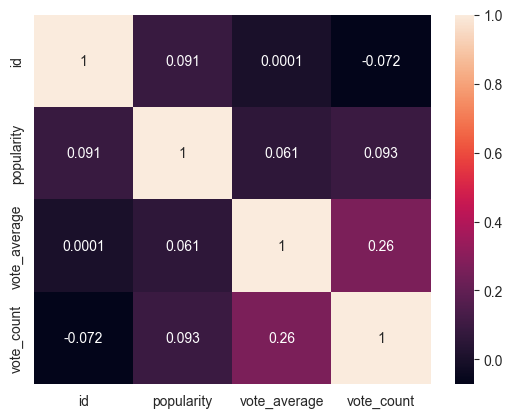

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder on the 'original_language' column
le.fit(movie_df['original_language'])

# Transform the 'original_language' column
movie_df['original_language'] = le.transform(movie_df['original_language'])
movie_df

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,9,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,15,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,9,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,9,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the 'popularity' column
scaler.fit(movie_df[['popularity']])

# Transform the 'popularity' column
movie_df['popularity'] = scaler.transform(movie_df[['popularity']])
movie_df

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,24,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,0.018598,2022-10-06,20th Century Girl,8.7,290
1,238,9,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",0.009403,1972-03-14,The Godfather,8.7,16988
2,278,9,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,0.009202,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,9,The Godfather Part II,In the continuing saga of the Corleone crime f...,0.004854,1974-12-20,The Godfather Part II,8.6,10293
4,667257,10,Cosas imposibles,"Matilde is a woman who, after the death of her...",0.003530,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,9,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",0.000978,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,15,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",0.000573,2014-12-31,Do Not Disturb,5.3,304
9997,50357,9,Apollo 18,"Officially, Apollo 17 was the last manned miss...",0.005561,2011-07-20,Apollo 18,5.3,839
9998,97795,9,Emergo,A team of parapsychologists sets out to invest...,0.000616,2011-10-11,Apartment 143,5.3,242


visualizing the data

                 id  original_language    popularity  vote_average  \
count  1.000000e+04       10000.000000  10000.000000  10000.000000   
mean   1.688979e+05          11.190800      0.002472      6.681610   
std    2.212173e+05           5.643224      0.012313      0.705462   
min    3.000000e+00           0.000000      0.000000      5.300000   
25%    1.016750e+04           9.000000      0.001053      6.100000   
50%    3.162500e+04           9.000000      0.001470      6.700000   
75%    3.266500e+05           9.000000      0.002259      7.200000   
max    1.024530e+06          43.000000      1.000000      8.700000   

         vote_count  
count  10000.000000  
mean    1592.082600  
std     2724.194868  
min      200.000000  
25%      319.000000  
50%      599.000000  
75%     1508.000000  
max    32679.000000  


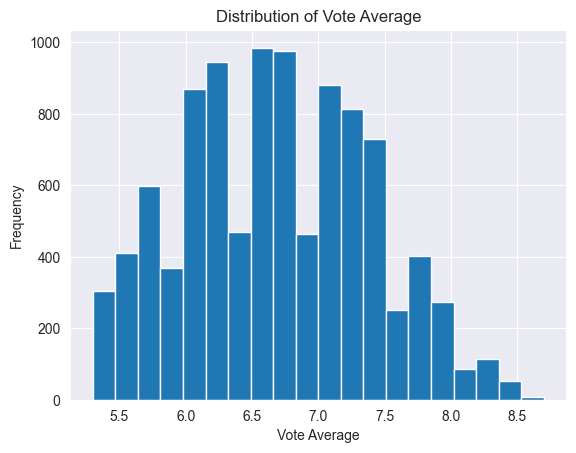

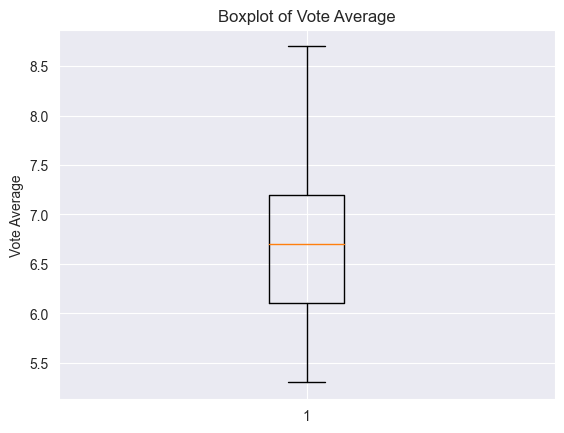

                         id  original_language  popularity  vote_average  \
id                 1.000000           0.100012    0.090691      0.000105   
original_language  0.100012           1.000000   -0.021470      0.183649   
popularity         0.090691          -0.021470    1.000000      0.060917   
vote_average       0.000105           0.183649    0.060917      1.000000   
vote_count        -0.072090          -0.137360    0.092649      0.264006   

                   vote_count  
id                  -0.072090  
original_language   -0.137360  
popularity           0.092649  
vote_average         0.264006  
vote_count           1.000000  


C:\Users\dagbo\AppData\Local\Temp\ipykernel_7236\2367960827.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie_df.corr()


In [9]:
# Get the statistics of the dataset
print(movie_df.describe())

# Plot the distribution of the vote_average feature
plt.hist(movie_df['vote_average'], bins=20)
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Average')
plt.show()

# Box plot of the vote_average feature
plt.boxplot(movie_df['vote_average'])
plt.ylabel('Vote Average')
plt.title('Boxplot of Vote Average')
plt.show()

# Correlation matrix of the dataset
corr_matrix = movie_df.corr()
print(corr_matrix)

Feature selection

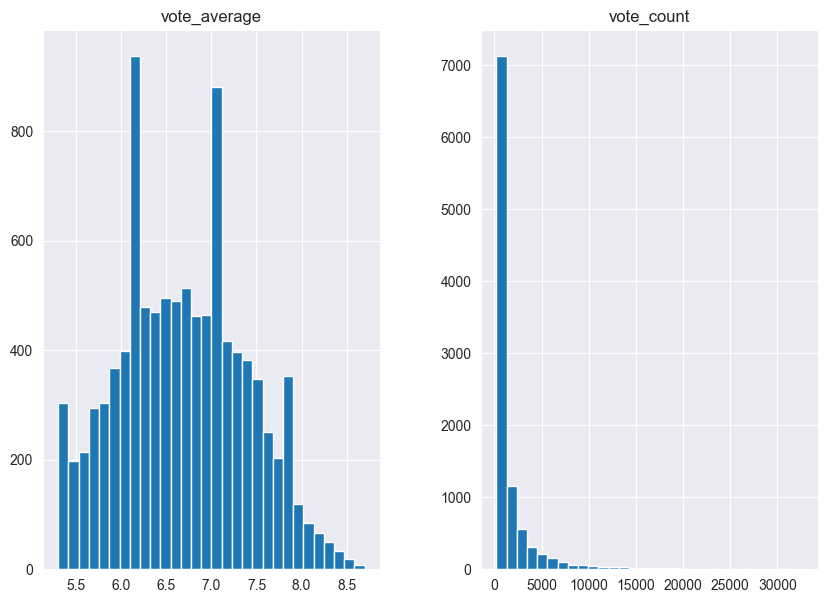

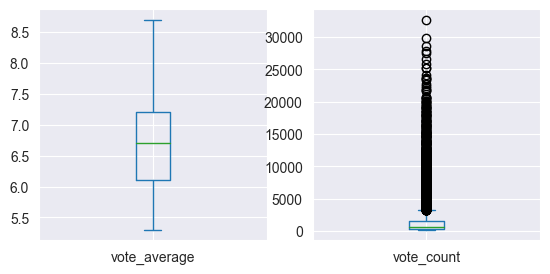

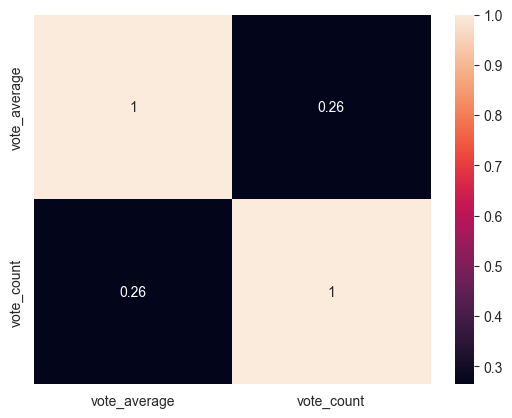

In [10]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of numerical features
numerical_features = ['vote_average', 'vote_count']
movie_df[numerical_features].hist(bins=30, figsize=(10,7))
plt.show()

# Plot box plots of numerical features
movie_df[numerical_features].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(10,3))
plt.show()

# Calculate the correlation matrix of the numerical features
corr_matrix = movie_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Select features with a correlation coefficient greater than 0.1 with the target variable
threshold = 0.1
important_features = corr_matrix[corr_matrix['vote_average'] > threshold].index
movie_df = movie_df[important_features]
